# Part B Problem 

Let $B_n$ denote that $n \times n$ matrix with $(i, j)$'th enntry equal to:


$$
\begin{aligned}
b_{ij} = \begin{cases}
\frac{1}{2j- i^2}, &\text{ if } i > j \\
\frac{i}{i- j}+  \frac{1}{n^2- j - i}, &\text{ if } j>i \\
0 &\text{ if } i = j
\end{cases}
\end{aligned}
$$



Look at the numerical values of the determinant of $B_n$ for $3≤n≤30$ and display these values graphically. You should observe that the values seem to follow a pattern.

  Look at the sequence and show  that  the  $n-\log{}$  or  $\log$-$\log$  transformation  gives  a  fit  that  is  approximately  linear  and  hence obtain  and  test  a  formula  that  predicts  the  value  of  the  sequence.   Define  a  function  that  predicts the value of the determinant of $Bn$.
  
What is the largest percentage error that your formula has for $30≤n≤50$?


## Preamble

In [64]:
import numpy as np


## Create the Matrix

Expressions in `Sympy` are generally immutable, matrices are the exception to this. A consequence of this is that attributes of matrix objects **occur in place**.

In order to generate an empty matrix the `np.empty() function can be used (unlike the `zeros` function it does not set the values to zero and may be marginally faster):

In [65]:
n = 2
mymat = np.empty([n, n])
mymat
# mymat.row(2)[1] = 7 

array([[5.e-324, 0.e+000],
       [5.e-324, 5.e-324]])

Then the values of the matrix may be modified by looping through the array:

In [66]:
for i in range(mymat.shape[0]):
    for j in range(mymat.shape[1]):
        print("(" + str(i) + "," + str(j) + ")")

(0,0)
(0,1)
(1,0)
(1,1)


and so to assign the values based on the condition in the problem:

In [67]:
def BuildMat(n):
    mymat = np.empty([n, n])
    for i in range(n):
        for j in range(n):
            # Increment i and j by one because they count from zero
            i += 1; j += 1
            if (i > j):
                v = 1/(2*j - i**2)
            elif (j > i):
                v = 1/(i-j) + 1/(n**2 - j - i)
            else:
                v = 0
            # Decrement i and j so the index lines up
            i -= 1; j -= 1
            mymat[j, i] = v
    return mymat

BuildMat(3)


array([[ 0.        , -0.5       , -0.14285714],
       [-0.83333333,  0.        , -0.2       ],
       [-0.3       , -0.75      ,  0.        ]])

## Find the Determinant

In [68]:
def detMat(n):
    ## Sympy
    # return Determinant(BuildMat(n)).doit()
    ## Numpy
    return np.linalg.det(BuildMat(n))
detMat(3)



-0.11928571428571424

## Find the Determinant of Various Values

In [69]:
# We double all numbers using map() 
result = map(detMat, range(30)) 
# print(list(result))
[round(num, 3) for num in list(result)]

[1.0,
 0.0,
 0.0,
 -0.119,
 -0.035,
 -0.018,
 -0.013,
 -0.01,
 -0.008,
 -0.006,
 -0.005,
 -0.004,
 -0.004,
 -0.003,
 -0.003,
 -0.002,
 -0.002,
 -0.002,
 -0.002,
 -0.001,
 -0.001,
 -0.001,
 -0.001,
 -0.001,
 -0.001,
 -0.001,
 -0.001,
 -0.001,
 -0.001,
 -0.001]

### Instead use absolute value

In [70]:
def detMat(n):
    return abs(np.linalg.det(BuildMat(n)))

# We double all numbers using map() 
result = map(detMat, range(30)) 

# print(list(result))
[round(num, 3) for num in list(result)]


[1.0,
 0.0,
 0.0,
 0.119,
 0.035,
 0.018,
 0.013,
 0.01,
 0.008,
 0.006,
 0.005,
 0.004,
 0.004,
 0.003,
 0.003,
 0.002,
 0.002,
 0.002,
 0.002,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001]

### Create a Data Frame

In [71]:
import pandas as pd

data = {'Matrix.Size': range(30),
        'Determinant.Value': list(map(detMat, range(30)))
}



df = pd.DataFrame(data, columns = ['Matrix.Size', 'Determinant.Value'])

print(df)

Matrix.Size  Determinant.Value
0             0           1.000000
1             1           0.000000
2             2           0.000000
3             3           0.119286
4             4           0.035258
5             5           0.018062
6             6           0.013023
7             7           0.009959
8             8           0.007822
9             9           0.006288
10           10           0.005158
11           11           0.004304
12           12           0.003645
13           13           0.003125
14           14           0.002708
15           15           0.002369
16           16           0.002090
17           17           0.001857
18           18           0.001661
19           19           0.001494
20           20           0.001351
21           21           0.001228
22           22           0.001121
23           23           0.001027
24           24           0.000945
25           25           0.000872
26           26           0.000807
27           27         

### Plot the Data frame

Observe that it is necessary to use `copy`, *Julia* and *Python* **unlike** *Mathematica* and ***R*** only create links between data, they do not create new objects, this can cause headaches when rounding data.

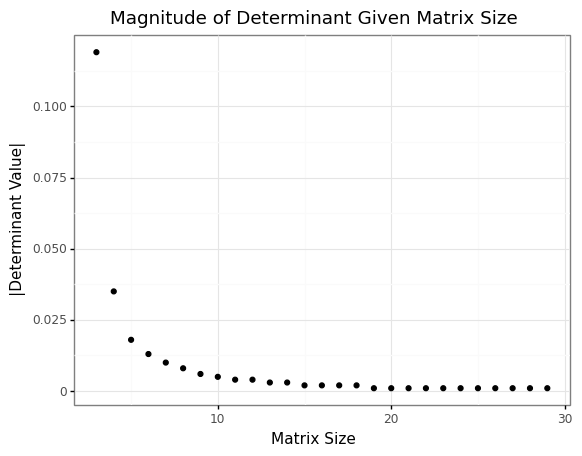

<ggplot: (8770001690691)>

In [72]:
from plotnine import *
import copy

df_plot = copy.copy(df[3:])
df_plot['Determinant.Value'] = df_plot['Determinant.Value'].astype(float).round(3)
df_plot

(
    ggplot(df_plot, aes(x = 'Matrix.Size', y = 'Determinant.Value')) +
        geom_point() +
        theme_bw() +
        labs(x = "Matrix Size", y = "|Determinant Value|") +
        ggtitle('Magnitude of Determinant Given Matrix Size')

)



    

In this case it appears that the determinant scales exponentially, we can attempt to model that linearly using `scikit`, this is significantly more complex than simply using ***R***. [^lrpy]

[^lrpy]: https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d

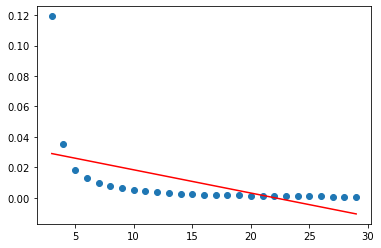

In [73]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

df_slice = df[3:]

X = df_slice.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df_slice.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions



plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

array([5.37864677])

## Log Transform the Data

The `log` function is actually provided by `sympy`, to do this quicker in `numpy` use `np.log()`

In [74]:
# # pyperclip.copy(df.columns[0])
# #df['Determinant.Value'] = 
# #[ np.log(val) for val in df['Determinant.Value']]

df_log = df

df_log['Determinant.Value'] = [ np.log(val) for val in df['Determinant.Value'] ]




In order to only have well defined values, consider only after size 3

In [75]:
df_plot = df_log[3:]
df_plot

,Matrix.Size,Determinant.Value
3,3,-2.126234
4,4,-3.345075
5,5,-4.013934
6,6,-4.341001
7,7,-4.609294
8,8,-4.850835
9,9,-5.069048
10,10,-5.267129
11,11,-5.448099
12,12,-5.614501


A limitation of the *Python* `plotnine` library (compared to *Ggplot2* in ***R***) is that it isn't possible to round values in the `aesthetics` layer, a further limitation with `pandas` also exists when compared to ***R*** that makes rounding data very clusy to do.

In order to round data use the `numpy` library:

In [76]:
import pandas as pd
import numpy as np
df_plot['Determinant.Value'] = df_plot['Determinant.Value'].astype(float).round(3)
df_plot

,Matrix.Size,Determinant.Value
3,3,-2.126
4,4,-3.345
5,5,-4.014
6,6,-4.341
7,7,-4.609
8,8,-4.851
9,9,-5.069
10,10,-5.267
11,11,-5.448
12,12,-5.615


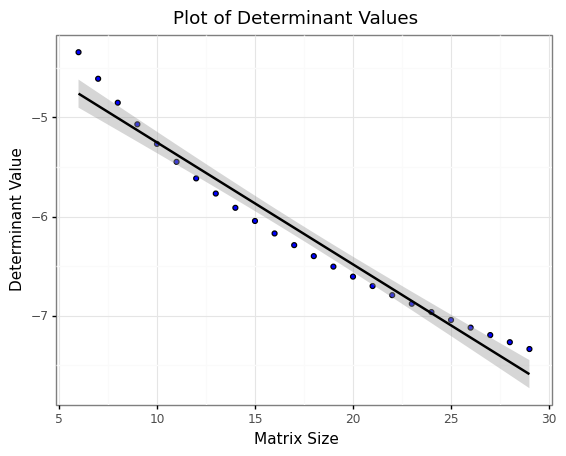

<ggplot: (8770002281897)>

In [77]:
from plotnine import *


(ggplot(df_plot[3:], aes(x = 'Matrix.Size', y = 'Determinant.Value')) +
   geom_point(fill= "Blue") +
   labs(x = "Matrix Size", y = "Determinant Value",
        title = "Plot of Determinant Values") +
   theme_bw() +
   stat_smooth(method = 'lm')
)



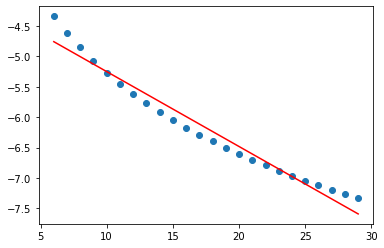

In [78]:
from sklearn.linear_model import LinearRegression

df_slice = df_plot[3:]

X = df_slice.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df_slice.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions



plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()


In [79]:
m = linear_regressor.fit(X, Y).coef_[0][0]
b = linear_regressor.fit(X, Y).intercept_[0]

print("y = " + str(m.round(2)) + "* x" + str(b.round(2)))


y = -0.12* x-4.02


So the model is:

$$
\text{abs}(\text{Det}(M)) = -4n - 0.12
$$

where:
- $n$ is the size of the square matrix

## Largest Percentage Error

To find the largest percentage error for $n \in [30, 50]$ it will be necessary to calculate the determinants for the larger range, compressing all the previous steps and calculating the model based on the larger amount of data:

In [80]:
import pandas as pd

data = {'Matrix.Size': range(30, 50),
        'Determinant.Value': list(map(detMat, range(30, 50)))
}
df = pd.DataFrame(data, columns = ['Matrix.Size', 'Determinant.Value'])
df['Determinant.Value'] = [ np.log(val) for val in df['Determinant.Value']]
df
from sklearn.linear_model import LinearRegression


X = df.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

m = linear_regressor.fit(X, Y).coef_[0][0]
b = linear_regressor.fit(X, Y).intercept_[0]

print("y = " + str(m.round(2)) + "* x" + str(b.round(2)))




y = -0.05* x-5.92


In [83]:
Y_hat = linear_regressor.predict(X)
res_per = (Y - Y_hat)/Y_hat
res_per



array([[-5.41415364e-03],
       [-3.51384602e-03],
       [-1.90798428e-03],
       [-5.74487234e-04],
       [ 5.06726599e-04],
       [ 1.35396448e-03],
       [ 1.98395424e-03],
       [ 2.41201322e-03],
       [ 2.65219545e-03],
       [ 2.71742022e-03],
       [ 2.61958495e-03],
       [ 2.36966444e-03],
       [ 1.97779855e-03],
       [ 1.45336983e-03],
       [ 8.05072416e-04],
       [ 4.09734813e-05],
       [-8.31432011e-04],
       [-1.80517224e-03],
       [-2.87375452e-03],
       [-4.03112573e-03]])

In [84]:
max_res = np.max(res_per)
max_ind = np.where(res_per == max_res)[0][0] + 30

print("The Maximum Percentage error is " + str(max_res.round(4) * 100) + "% which corresponds to a matrix of size " + str(max_ind))



The Maximum Percentage error is 0.27% which corresponds to a matrix of size 39
